In [1]:
#import libraries

import pandas as pd
import numpy as np

In [2]:
#import file
df = pd.read_csv('../data/station_daily_mean_for_map.csv')
print(df.info())
print(df['STATION'].value_counts())

df_top8_locations = df.loc[df['ENTRY_COUNT'] > 165000]
df_top8_locations.sort_values(by=['ENTRY_COUNT'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 7 columns):
Unnamed: 0           339 non-null int64
STATION              339 non-null object
Station_Latitude     339 non-null float64
Station_Longitude    339 non-null float64
ENTRIES              339 non-null float64
EXITS                339 non-null float64
ENTRY_COUNT          339 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 18.7+ KB
None
Harlem-148th St                    1
Briarwood-Van Wyck Blvd            1
Eastern Parkway-Brooklyn Museum    1
181st St                           1
88th St-Boyd Av                    1
                                  ..
Graham Av                          1
East 180th St                      1
Beach 44th St                      1
Ralph Av                           1
Prospect Park                      1
Name: STATION, Length: 339, dtype: int64


,Unnamed: 0,STATION,Station_Latitude,Station_Longitude,ENTRIES,EXITS,ENTRY_COUNT
17,17,14th St-Union Square,40.734673,-73.989951,5.021280e+09,1.908664e+09,172224.0
47,47,23rd St,40.741303,-73.989344,3.954391e+10,4.350319e+10,176797.0
93,93,86th St,40.622687,-74.028398,1.464227e+10,1.573256e+10,180276.0
55,55,34th St-Herald sq,40.749719,-73.987823,3.009513e+10,3.769739e+10,195278.0
62,62,42nd St,40.757308,-73.989735,5.742116e+10,4.640477e+10,219760.0
211,211,Grand Central-42nd St,40.751776,-73.976848,1.383058e+10,1.019805e+10,221230.0
57,57,34th St-Penn Stn,40.750373,-73.991057,2.264152e+10,2.401313e+10,271958.0
335,335,World Trade Center,40.712582,-74.009781,1.454613e+10,1.170279e+10,318639.0


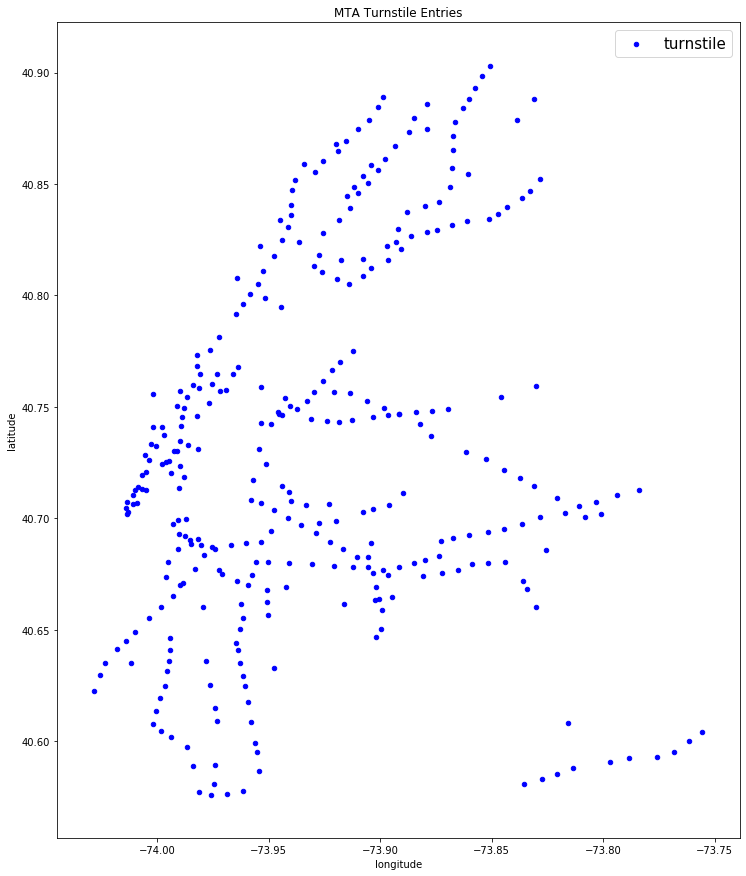

In [3]:
#geo plot station locations: each marker is plotted per Station_Longitude and Station_Latitude 
import descartes
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon 
%matplotlib inline

geometry = [Point(xy) for xy in zip(df["Station_Longitude"],df["Station_Latitude"])]
geometry[:3]

geo_df = gpd.GeoDataFrame(df, geometry=geometry)
geo_df.head(20)


street_map = gpd.read_file('../data/station_daily_mean_for_map.csv')

fig, ax = plt.subplots(figsize =(15,15))
street_map.plot(ax=ax, alpha=0.4, color="grey")
geo_df[geo_df['STATION']!='NaN'].plot(ax=ax, markersize = 20, color="blue", marker = "o", label = "turnstile")
plt.title('MTA Turnstile Entries')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(prop={'size':15});

In [4]:
def process_dataframes(df_geo):
    """This is a function to create new geo dataframe for geo plot of sum(ENTRY_COUNT)"""
    df_geo = df.dropna()
    agg_entries = geo_df.groupby(['STATION', 'Station_Latitude', 'Station_Longitude'])['ENTRY_COUNT'].sum().reset_index()
    return agg_entries
mta_turnstile_entries = process_dataframes(geo_df)
print(mta_turnstile_entries.head())


                       STATION  Station_Latitude  Station_Longitude  \
0                     103rd St         40.796092         -73.961454   
1            104th St-102nd St         40.695178         -73.844330   
2                     110th St         40.795020         -73.944250   
3  110th St-Central Park North         40.799075         -73.951822   
4                     111th St         40.697418         -73.836345   

   ENTRY_COUNT  
0      75428.0  
1       5935.0  
2      17967.0  
3      14655.0  
4      20102.0  


In [5]:
def add_markers_folium_map(df, m, color): 
    """This is a function to create folium circle markers, to be overlaid onto map """
    for i in range(0,len(df)):
        folium.Circle(location=[df['Station_Latitude'][i], df['Station_Longitude'][i]], popup='Turnstile Entries: '+df['STATION'][i]+ ' #ENTRY_COUNT = %i' %int(df['ENTRY_COUNT'][i]), radius=float(df['ENTRY_COUNT'][i])*0.002, color = color, fill = True, fill_color = color).add_to(m)
    return m

In [6]:
import folium
from folium import plugins


In [7]:
#plot folium map & the circle markers for MTA Stations (red)
#larger radius is proportional to higher ENTRY_COUNT 
mta_turnstile_entries.describe()
m = folium.Map(width=1000,height=1000, zoom_start=12,location=[np.mean(mta_turnstile_entries['Station_Latitude']), np.mean(mta_turnstile_entries['Station_Longitude'])])

add_markers_folium_map(mta_turnstile_entries, m, 'red')


In [8]:
#New York Tech Schools
schools = {'NYU': {'Station_Latitude': 40.695228, 'Station_Longitude': -73.986698, 'Number_of_Students': 5331}, 'CUNY': {'Station_Latitude':40.695364, 'Station_Longitude': -73.987545, 'Number_of_Students': 17269}, 'CUNY': {'Station_Latitude':40.695364, 'Station_Longitude': -73.987545, 'Number_of_Students': 17269}, 'NYIT': {'Station_Latitude': 40.770076, 'Station_Longitude': -73.982869, 'Number_of_Students': 9000}}
df_schools = pd.DataFrame(data=schools)

In [9]:
transposed_df_schools = df_schools.transpose()
transposed_df_schools['School'] = transposed_df_schools.index
transposed_df_schools

,Station_Latitude,Station_Longitude,Number_of_Students,School
NYU,40.695228,-73.986698,5331.0,NYU
CUNY,40.695364,-73.987545,17269.0,CUNY
NYIT,40.770076,-73.982869,9000.0,NYIT


In [10]:
#New York Tech Companies
tech_companies = {'IBM': {'Station_Latitude': 40.762346, 'Station_Longitude': -73.972951, 'Sqft': 1007420}, 'Etsy': {'Station_Latitude': 40.700818, 'Station_Longitude': -73.988167, 'Sqft': 164115},  'Jet.Com': {'Station_Latitude': 40.738834, 'Station_Longitude': -74.027751, 'Sqft': 512000}, 'Seamless': {'Station_Latitude': 40.754182, 'Station_Longitude': -73.985301, 'Sqft': 585000}, 'Foursquare': {'Station_Latitude': 40.742401, 'Station_Longitude': -73.991695, 'Sqft': 339849},  'Yext': {'Station_Latitude': 40.741325, 'Station_Longitude': -73.987477, 'Sqft': 58194}, 'Amazon': {'Station_Latitude': 40.753514, 'Station_Longitude': -73.998919, 'Sqft': 1335040}, 'Google': {'Station_Latitude': 40.741623, 'Station_Longitude': -74.003355, 'Sqft': 2900000}, 'Flatiron Health': {'Station_Latitude': 40.725873, 'Station_Longitude': -74.004721, 'Sqft': 313379}, 'INSPR': {'Station_Latitude': 40.746296, 'Station_Longitude': -73.983942, 'Sqft': 12837}, 'Veritonic': {'Station_Latitude': 40.752577, 'Station_Longitude': -73.980661, 'Sqft': 83247}, 'Company': {'Station_Latitude': 40.753834, 'Station_Longitude': -73.978093, 'Sqft': 1100000}, 'Newsela': {'Station_Latitude': 40.756292, 'Station_Longitude': -73.990192, 'Sqft': 79000}, 'Red Antler': {'Station_Latitude': 40.704129, 'Station_Longitude': -73.986681, 'Sqft': 41400}, 'Huge': {'Station_Latitude': 40.703063, 'Station_Longitude': -73.990534, 'Sqft': 4750000}}
df_tech_companies = pd.DataFrame(data=tech_companies)

#Forbes: https://www.forbes.com/sites/valleyvoices/2019/03/27/how-new-york-tech-grew-up-and-moved-uptown/#6c66cb1941bf
#Forbes: https://www.forbes.com/sites/heathersenison/2019/02/06/its-official-new-york-city-outranks-san-francisco-as-worlds-top-tech-city/#4126afba7941

In [11]:
transposed_df_tech_companies = df_tech_companies.transpose()
transposed_df_tech_companies['TechCompanies'] = transposed_df_tech_companies.index
transposed_df_tech_companies

,Station_Latitude,Station_Longitude,Sqft,TechCompanies
IBM,40.762346,-73.972951,1007420.0,IBM
Etsy,40.700818,-73.988167,164115.0,Etsy
Jet.Com,40.738834,-74.027751,512000.0,Jet.Com
Seamless,40.754182,-73.985301,585000.0,Seamless
Foursquare,40.742401,-73.991695,339849.0,Foursquare
Yext,40.741325,-73.987477,58194.0,Yext
Amazon,40.753514,-73.998919,1335040.0,Amazon
Google,40.741623,-74.003355,2900000.0,Google
Flatiron Health,40.725873,-74.004721,313379.0,Flatiron Health
INSPR,40.746296,-73.983942,12837.0,INSPR


In [12]:
#Add circle markers for tech schools to map (blue)
#larger radius is proportional to higher number of students 

geometry_schools = [Point(xy) for xy in zip(transposed_df_schools["Station_Longitude"],transposed_df_schools["Station_Latitude"])]

geo_df_schools = gpd.GeoDataFrame(transposed_df_schools, geometry=geometry_schools)
geo_df_schools


def add_markers_folium_map(transposed_df_schools, m, color): 
    for i in range(0,len(transposed_df_schools)):
        folium.Circle(location=[transposed_df_schools['Station_Latitude'][i], transposed_df_schools['Station_Longitude'][i]], popup='Number_of_Students: '+transposed_df_schools['School'][i]+ ' #Number_of_Students = %i' %transposed_df_schools['Number_of_Students'][i], radius=float(transposed_df_schools['Number_of_Students'][i])*0.003, color = color, fill = True, fill_color = color).add_to(m)
    return m

add_markers_folium_map(transposed_df_schools, m, 'blue')

In [13]:
#Add circle markers for tech companies to map (black)
#larger radius is proportional to higher building square footage 
#NOTE: have to divide Sqft by standard number (i.e., 100) to normalize circle sizes--otherwise too large to see differences

geometry_tech_companies = [Point(xy) for xy in zip(transposed_df_tech_companies["Station_Longitude"],transposed_df_tech_companies["Station_Latitude"])]

geo_df_tech_companies = gpd.GeoDataFrame(transposed_df_tech_companies, geometry=geometry_tech_companies)
geo_df_tech_companies


transposed_df_tech_companies['Sqft'] = transposed_df_tech_companies['Sqft']/100


def add_markers_folium_map(transposed_df_tech_companies, m, color): 
    for i in range(0,len(transposed_df_tech_companies)):
        folium.Circle(location=[transposed_df_tech_companies['Station_Latitude'][i], transposed_df_tech_companies['Station_Longitude'][i]], popup='TechCompany: '+transposed_df_tech_companies['TechCompanies'][i]+ ' #Sqft = %i' %int(transposed_df_tech_companies['Sqft'][i]*100), radius=float(transposed_df_tech_companies['Sqft'][i])*0.003, color = color, fill = True, fill_color = color).add_to(m)
    return m

add_markers_folium_map(transposed_df_tech_companies, m, 'black')